# Q3 - Part 1 : Manipulate data as necessary & create a scatter plot using any plotting library

**Solution:**

**Importing Required Libraries & Reading the datafile**

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

# reading data file
dataset = pd.read_csv('https://raw.githubusercontent.com/DrUzair/MachineLearning/master/Datasets/binary_class_2d.csv')



**Understanding the Data**

1) Number of Rows and Columns 
2) Duplicates 
3) Missing or null values 
4) Datatypes of features 
5) Statistics

**1. Number of Rows and Columns**

In [11]:
# number of rows and columns in the dataset. \
dataset.shape

(99, 3)

**2. Duplicates**

In [12]:
# How many duplicate rows and columns do we have in our dataset?
dataset.duplicated().sum()

0

**3. Missing or null values**

In [60]:
dataset.isnull().sum()

-0.590911854382    0
0.221097787545     0
0                  0
dtype: int64

**4. Datatypes of features**

In [13]:
info=dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   -0.590911854382  99 non-null     float64
 1   0.221097787545   99 non-null     float64
 2   0                99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


**5.Statistics**

In [14]:
dataset.describe()

,-0.590911854382,0.221097787545,0
count,99.000000,99.000000,99.000000
mean,3.972875,5.075990,0.505051
std,3.119784,3.321910,0.502519
min,-0.651939,-0.552670,0.000000
25%,0.999647,1.913945,0.000000
50%,4.655505,4.836154,1.000000
75%,6.927850,8.156762,1.000000
max,9.811431,11.771933,1.000000


we see the column names do not make sense, lets rename them to Feature 1 (x1) , Feature 2(x2) , Target (y)  

In [15]:
dataset.columns = ['Feature 1 ', 'Feature 2 ', 'Target (y ) ']


**Creating a correlation matrix to understand the correlation between Features and target variable**

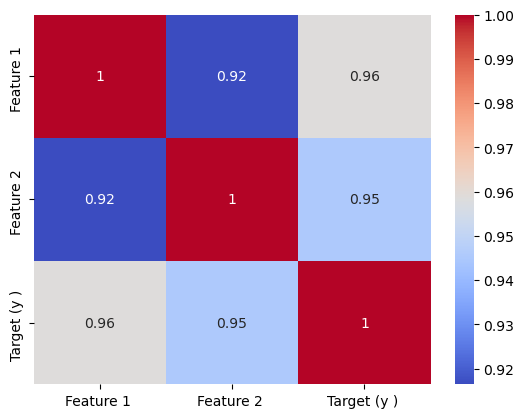

In [16]:
# Correlation Heatmap for Features 1 , Fatures 2 , Target Variable y 
corr = dataset[['Feature 1 ', 'Feature 2 ','Target (y ) ']].corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Plotting a scatter graph**

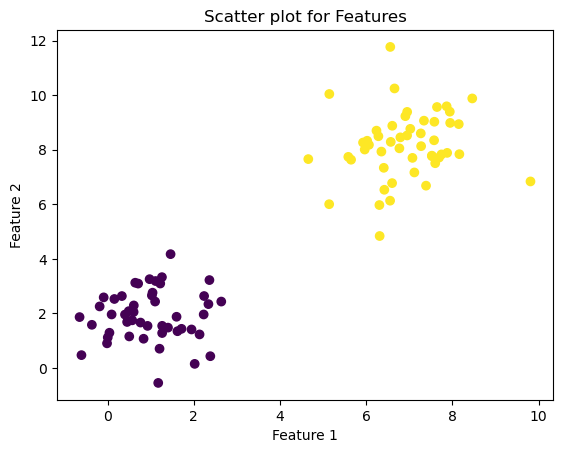

In [17]:
plt.scatter(data=dataset, x= "Feature 1 ", y="Feature 2 ",  c= dataset["Target (y ) "])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot for Features")
plt.show()

# PART 2- Use the following class definition as skeleton of your code

Using the formulas for pi, mu0, mu1, sigma as below 

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*NeeSLnPEoPI8f0p6Y0oCcQ.png" style="width: 600px;"/></center>



In [2]:
#we are using 4 paramters : 
#mu0,mu1 - mean of the 2 classes y=1 and y=0
#sigma - covariance of both classes , we are taking same 
#pi - probability estimate 

class GDA():
    
    #For initialising the 4 paramaters 
    def __init__(self):
        self.pi = None
        self.mu0 = None
        self.mu1 = None
        self.sigma = None
        self.sigma_inv = None
        

        #  "train" function is used Training the model , estimating GDA Parameters, basis x and y values 
    def train(self, x, y):
        
        #pi = mean of y values
        self.pi = np.mean(y)
        
        # mu0, mu1 
        self.mu0 = np.mean(X[y==0], axis=0)
        self.mu1 = np.mean(X[y==1], axis=0)
        
        # coviariance calculations
        n_x = x[y== 0] - self.mu0
        p_x = x[y== 1] - self.mu1
        
      
        #covariance 
        self.sigma = ((n_x.T).dot(n_x) + (p_x.T).dot(p_x))/X.shape[0]
        print("self.sigma", self.sigma)
        
        
        #covariance inverse 
        self.sigma_inv = np.linalg.inv(self.sigma)

        
        # "predict" function returns a prediction vector which is based on GDA Paramters. 
        # calculates likelihood of datapoint belonging to a class . Uses Gaussian Disrtibution .
        
    def predict(self, x):
        p0 = np.sum(np.dot((x-self.mu0),self.sigma_inv)*(x-self.mu0),axis=1)*self.pi
        p1 = np.sum(np.dot((x-self.mu1),self.sigma_inv)*(x-self.mu1),axis=1)*self.pi
        return p1 >= p0
    
    # To make it Normal Distribution
    def normal_distribution(self, x, mu, sigma):
        n = x.shape[1]
        return (1 / (2 * np.pi) * ((n + 1) / 2) / np.sqrt(np.linalg.det(sigma))) * np.exp(
            -0.5 * np.sum(np.dot((x - mu), np.linalg.inv(self.sigma)) * (x - mu), axis=1))


# PART 3 - Write a function to draw the decision boundary and contours of each class along with the data points


The aim of this function is to create a scatter plot of data points, plot the decision boundary & visualize the contour of the data points ( gaussian distribution) 

In [73]:
def contour_plot(gda_model, X, y):
    
    #size of plot
    plt.figure(figsize=(10, 8))
    
    # Creating a Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    #why min and max values - to ensure a proper graph is plotted without any distortion.
    #plot can b properly scaled 
    x1_min = X[:, 0].min() 
    x2_min = X[:, 1].min()
    x1_max = X[:, 0].max() 
    x2_max = X[:, 1].max()

    # Defining range for x and y values
    x1_value = np.linspace(x1_min-1, x1_max+1,400)
    x2_value = np.linspace(x2_min-1, x2_max+1,400)

    # Why Meshgrid? Say, we want a grid where there's a point at every int val bw 0-3 for x & y axis,
    # It will create a rectangular grid with every combination of x&y value.
    x1_meshgrid, x2_meshgrid = np.meshgrid(x1_value, x2_value)

    # RAVEL: transform these 2D arrays into 1D arrays
    grid = np.c_[x1_meshgrid.ravel(), x2_meshgrid.ravel()]

    output = gda_model.predict(grid)
    output = output.reshape(x1_meshgrid.shape)

    # plotting the decision boundary
    plt.contour(x1_meshgrid, x2_meshgrid, output)
    
    
    #contour Plot y=0 class
    y0=gda_model.normal_distribution(grid,gda_model.mu0, gda_model.sigma)
    y0=y0.reshape(x1_meshgrid.shape)
    cplot0=plt.contour(x1_meshgrid,x2_meshgrid,y0)
    
    
    #contour Plot y=1 class
    y1=gda_model.normal_distribution(grid,gda_model.mu1, gda_model.sigma)
    y1=y1.reshape(x2_meshgrid.shape)
    cplot1=plt.contour(x1_meshgrid,x2_meshgrid,y1)
    

self.sigma [[0.77865383 0.10462239]
 [0.10462239 1.16332662]]


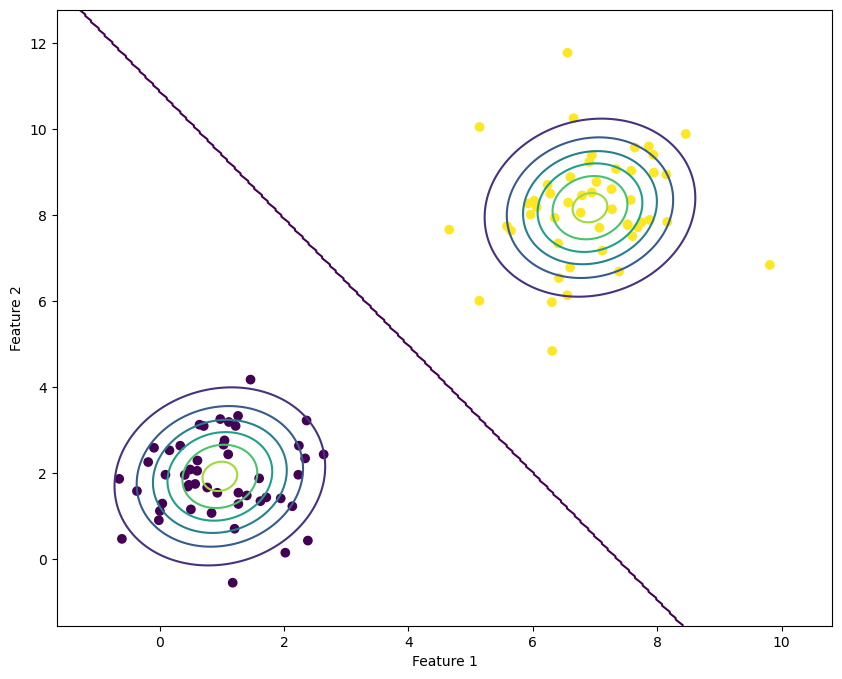

In [79]:
#Why are we slicing ? 
# X and y are 0-d arr, which are not suitable for doing algebra operations
# So, we've to makesure X,y arr passed to the train function (GDA class) are 2D 


X = dataset.iloc[:, :-1].values
gda = GDA()

y = dataset.iloc[:, -1].values
gda.train(X, y)

contour_plot(gda, X, y)

plt.show()

# Part 4- Explain the difference between GDA and Logistic Regression as a classifier ?


Comparison of GDA Vs Logisitc Regression ( Picture courtsey - Andrew NG Notes) 

<center><img src="https://aman.ai/cs229/assets/gda/21.jpg"  style="width: 400px;"/></center>

1) **Modelling** - 

> Logistic Regression is a Discriminative Algorithm which directly model conditional probability of the class labels P(y|x) from the training dataset. As the name suggests, "discriminative" models can discriminate bw the data points. 

> GDA is a  Generative Algorithms which model joint probability P(x|y) and P(y). As the name suggests, "generative" models can generate new datapoints.

2) **Decision Boundary** 

> Logistic Regression has decision boundary based on linear functions- it just segregates the 2 classes from each other. It does not have the ability to generate new data.

> GDA has a decision boundary which can capture more complex information about the feature. It has ability to generate new data.

3) **Assumption**

>Logistic Regression doesnt make any assumption about distribution of the features

> while GDA makes assumptions that  features in every class follow a Gaussian distribution & covariance matrix for all class are equivalent

Note: When dataset in not Gaussian and it is large, in practise we use Logistic Regression more commonly than we use GDA becuase Logistic Regression will perform better



<center><img src="https://miro.medium.com/v2/resize:fit:1171/1*_ajkhD8gbCBwVFOjNfEAzw.png"  style="width: 600px;"/></center>